<a href="https://colab.research.google.com/github/HungChunLi/NTUFastpitch-Stat/blob/main/20220301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!/opt/bin/nvidia-smi

/bin/bash: /opt/bin/nvidia-smi: No such file or directory


# 匯入套件

In [2]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
from progressbar import *

# 匯入資料集


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
item = pd.read_csv(
  '/content/gdrive/MyDrive/實習生範例資料/item_log.csv',
  header=None,
  names=["timestamp", "IP", "request", "status code", "user agent", "source", "ts_id", "cid", "type"]
)

print(item.shape)
item.head()

(2882837, 9)


,timestamp,IP,request,status code,user agent,source,ts_id,cid,type
0,2022-02-18T05:00:00.000+08:00,1.171.117.168,GET /log.gif?1645131600408&_ts_id=37023203330A...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 14_1 like M...,https://www.ruten.com.tw/item/show?21908915147388,37023203330A3F063300.1606768436,10134089,pv
1,2022-02-18T05:00:00.000+08:00,1.200.126.81,GET /log.gif?1645131600571&_ts_id=202106191004...,200,Mozilla/5.0 (Linux; Android 12; SM-A426B Build...,https://www.ruten.com.tw/item/show?21522570502292,20210619100438545393.1624096422,2581176,pv
2,2022-02-18T05:00:00.000+08:00,123.194.12.140,GET /log.gif?1645131602910&_ts_id=340D390A3E06...,200,Mozilla/5.0 (Linux; Android 7.0; HTC_M9u) Appl...,https://www.ruten.com.tw/item/show?21835573458753,340D390A3E0632023A0B.1517928541,6332346,pv
3,2022-02-18T05:00:01.000+08:00,110.26.75.96,GET /log.gif?1645131599914&_ts_id=202202132009...,200,Mozilla/5.0 (Linux; Android 10; V2029 Build/QP...,https://www.ruten.com.tw/item/show?21727660899793,20220213200992489252.1644683840,18989109,pv
4,2022-02-18T05:00:01.000+08:00,111.83.24.100,GET /log.gif?1645131600528&_ts_id=202103102000...,200,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A60...,https://www.ruten.com.tw/item/show?22040521081432,20210310200023227175.1615367433,2776164,pv


In [6]:
user_interest = pd.read_csv(
  '/content/gdrive/MyDrive/newitem.csv/user_interest.csv',
)

print(user_interest.shape)
user_interest.head()

(1964304, 3)


,CID,L1,n_pv
0,6475262.0,13.0,8969.0
1,9316887.0,22.0,205.0
2,4329340.0,14.0,3.0
3,6577528.0,23.0,30.0
4,16064244.0,11.0,836.0


# 解析gclass

In [ ]:
# 測試資料
test = item['request'][0]
test

'GET /log.gif?1645131600408&_ts_id=37023203330A3F063300.1606768436&type=pv&nick=73134333471656265657c626&ref=https%3A%2F%2Fwww.ruten.com.tw%2Fitem%2Fshow%3F21517145351061&user_set=gNo%253D21908915147388%2526seller%253Doasmoto%2526g_class%253D0019000500020009& HTTP/1.1'

In [ ]:
# 定義解析出gclass的函式
def testFn(x):
  try:
    y = re.search(r'g_class%\d+D(\d+)', x)
    y = y.groups()[0]
    return y
    
  except TypeError:
    pass
  except AttributeError:
    pass

print(testFn(test))

0019000500020009


In [ ]:
# 解析出gclass
item['gclass'] = item['request'].apply(lambda x: testFn(x))
print(item.shape)
item.head(5)

(2882837, 10)


,timestamp,IP,request,status code,user agent,source,ts_id,cid,type,gclass
0,2022-02-18T05:00:00.000+08:00,1.171.117.168,GET /log.gif?1645131600408&_ts_id=37023203330A...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 14_1 like M...,https://www.ruten.com.tw/item/show?21908915147388,37023203330A3F063300.1606768436,10134089,pv,0019000500020009
1,2022-02-18T05:00:00.000+08:00,1.200.126.81,GET /log.gif?1645131600571&_ts_id=202106191004...,200,Mozilla/5.0 (Linux; Android 12; SM-A426B Build...,https://www.ruten.com.tw/item/show?21522570502292,20210619100438545393.1624096422,2581176,pv,0024000100090002
2,2022-02-18T05:00:00.000+08:00,123.194.12.140,GET /log.gif?1645131602910&_ts_id=340D390A3E06...,200,Mozilla/5.0 (Linux; Android 7.0; HTC_M9u) Appl...,https://www.ruten.com.tw/item/show?21835573458753,340D390A3E0632023A0B.1517928541,6332346,pv,002300060006
3,2022-02-18T05:00:01.000+08:00,110.26.75.96,GET /log.gif?1645131599914&_ts_id=202202132009...,200,Mozilla/5.0 (Linux; Android 10; V2029 Build/QP...,https://www.ruten.com.tw/item/show?21727660899793,20220213200992489252.1644683840,18989109,pv,0009000500140005
4,2022-02-18T05:00:01.000+08:00,111.83.24.100,GET /log.gif?1645131600528&_ts_id=202103102000...,200,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A60...,https://www.ruten.com.tw/item/show?22040521081432,20210310200023227175.1615367433,2776164,pv,0006001700050001


In [ ]:
# 檢查前100筆gclass
print(item['gclass'][:100])

# 發現有None 有些資料沒有gclass

0             0019000500020009
1             0024000100090002
2                 002300060006
3             0009000500140005
4             0006001700050001
5                     00130016
6                         None
7         00190004000300030001
8                     00050008
9                     00200005
10            0019000400010014
11                001900070005
12                        None
13                        None
14                001900050005
15                001900040008
16            0005002500010012
17                    00060007
18            0005000100040009
19        00090021000600020021
20                000200180008
21            0011000300080003
22        00090021000600090007
23                001100130009
24                    00230019
25            0022002500030001
26                000500140020
27            0005000100050006
28                001900040008
29                002300240007
30            0009002100090017
31                    00090014
32      

____________________________________________

## 檢查無類別資料


In [ ]:
req = item.loc[:, ['gclass']]
req = req[req['gclass'].notnull()]

In [ ]:
print(req.shape)
req.head(100)

(2741881, 1)


,gclass
0,0019000500020009
1,0024000100090002
2,002300060006
3,0009000500140005
4,0006001700050001
5,00130016
7,00190004000300030001
8,00050008
9,00200005
10,0019000400010014


## 檢查異常類別資料

In [ ]:
def Validation(x):
    return (x[:2] == '00')

test2 = '0019000500020009'
print(Validation(test2))

True


In [ ]:
req['validation'] = req['gclass'].apply(lambda x: Validation(x))

In [ ]:
# 檢查異常類別數量

outcome = req.groupby('validation')
outcome.size()

validation
False       4672
True     2737209
dtype: int64

In [ ]:
# 檢查異常類別內容

req[req['validation'] == False]

# 9998、9999為測資與未分類，需刪除

,gclass,validation
120,9998,False
313,9998,False
1196,9998,False
2366,9998,False
2638,9998,False
2717,9998,False
2730,9998,False
2745,9998,False
2831,9998,False
3206,9998,False


## 刪除無類別與異常類別（未分類）資料

In [ ]:
item = item[item['gclass'].notnull()]
print(item.shape)
item.head()

(2741881, 10)


,timestamp,IP,request,status code,user agent,source,ts_id,cid,type,gclass
0,2022-02-18T05:00:00.000+08:00,1.171.117.168,GET /log.gif?1645131600408&_ts_id=37023203330A...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 14_1 like M...,https://www.ruten.com.tw/item/show?21908915147388,37023203330A3F063300.1606768436,10134089,pv,0019000500020009
1,2022-02-18T05:00:00.000+08:00,1.200.126.81,GET /log.gif?1645131600571&_ts_id=202106191004...,200,Mozilla/5.0 (Linux; Android 12; SM-A426B Build...,https://www.ruten.com.tw/item/show?21522570502292,20210619100438545393.1624096422,2581176,pv,0024000100090002
2,2022-02-18T05:00:00.000+08:00,123.194.12.140,GET /log.gif?1645131602910&_ts_id=340D390A3E06...,200,Mozilla/5.0 (Linux; Android 7.0; HTC_M9u) Appl...,https://www.ruten.com.tw/item/show?21835573458753,340D390A3E0632023A0B.1517928541,6332346,pv,002300060006
3,2022-02-18T05:00:01.000+08:00,110.26.75.96,GET /log.gif?1645131599914&_ts_id=202202132009...,200,Mozilla/5.0 (Linux; Android 10; V2029 Build/QP...,https://www.ruten.com.tw/item/show?21727660899793,20220213200992489252.1644683840,18989109,pv,0009000500140005
4,2022-02-18T05:00:01.000+08:00,111.83.24.100,GET /log.gif?1645131600528&_ts_id=202103102000...,200,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A60...,https://www.ruten.com.tw/item/show?22040521081432,20210310200023227175.1615367433,2776164,pv,0006001700050001


In [ ]:
item['validation'] = item['gclass'].apply(lambda x: Validation(x))
item.drop(item[item['validation'] == False].index, inplace=True)
print(item.shape)
item.head()

(2737209, 11)


,timestamp,IP,request,status code,user agent,source,ts_id,cid,type,gclass,validation
0,2022-02-18T05:00:00.000+08:00,1.171.117.168,GET /log.gif?1645131600408&_ts_id=37023203330A...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 14_1 like M...,https://www.ruten.com.tw/item/show?21908915147388,37023203330A3F063300.1606768436,10134089,pv,0019000500020009,True
1,2022-02-18T05:00:00.000+08:00,1.200.126.81,GET /log.gif?1645131600571&_ts_id=202106191004...,200,Mozilla/5.0 (Linux; Android 12; SM-A426B Build...,https://www.ruten.com.tw/item/show?21522570502292,20210619100438545393.1624096422,2581176,pv,0024000100090002,True
2,2022-02-18T05:00:00.000+08:00,123.194.12.140,GET /log.gif?1645131602910&_ts_id=340D390A3E06...,200,Mozilla/5.0 (Linux; Android 7.0; HTC_M9u) Appl...,https://www.ruten.com.tw/item/show?21835573458753,340D390A3E0632023A0B.1517928541,6332346,pv,002300060006,True
3,2022-02-18T05:00:01.000+08:00,110.26.75.96,GET /log.gif?1645131599914&_ts_id=202202132009...,200,Mozilla/5.0 (Linux; Android 10; V2029 Build/QP...,https://www.ruten.com.tw/item/show?21727660899793,20220213200992489252.1644683840,18989109,pv,0009000500140005,True
4,2022-02-18T05:00:01.000+08:00,111.83.24.100,GET /log.gif?1645131600528&_ts_id=202103102000...,200,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A60...,https://www.ruten.com.tw/item/show?22040521081432,20210310200023227175.1615367433,2776164,pv,0006001700050001,True


In [ ]:
# 檢查確定無異常類別資料
item.groupby('validation').size()

validation
True    2737209
dtype: int64

In [ ]:
# 刪除不要的行
del item['validation']
# del item['index']
print(item.shape)
item.tail()

(2737209, 10)


,timestamp,IP,request,status code,user agent,source,ts_id,cid,type,gclass
2882832,2022-02-18T14:59:59.000+08:00,49.216.222.236,GET /log.gif?1645167599049&_ts_id=202202183000...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 15_2_1 like...,https://www.ruten.com.tw/item/show?21510531055402,20220218300044120966.1645167559,-,pv,0009002100060018
2882833,2022-02-18T14:59:59.000+08:00,59.127.183.127,GET /log.gif?1645167601865&_ts_id=370431053301...,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.ruten.com.tw/item/show?21528052927823,370431053301380A3A0F.1595576314,-,pv,0015000800110001
2882834,2022-02-18T14:59:59.000+08:00,60.244.93.153,GET /log.gif?1645167603867&_ts_id=37063001350C...,200,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,https://www.ruten.com.tw/item/show?21309060541629,37063001350C380A3E06.1562308715,1671686,pv,0009001500130003
2882835,2022-02-18T14:59:59.000+08:00,61.224.151.243,GET /log.gif?1645167599123&_ts_id=202112302006...,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.ruten.com.tw/item/show?21212208998374,20211230200608684904.1640851564,4805543,pv,0011000100080004
2882836,2022-02-18T14:59:59.000+08:00,61.62.148.194,GET /log.gif?1645167600050&_ts_id=202106242005...,200,Mozilla/5.0 (Linux; Android 11; M2102J20SG) Ap...,https://www.ruten.com.tw/item/show?22027786881898,20210624200550473384.1624476494,3641074,pv,000900220013


# 匯出


In [ ]:
item.reset_index(inplace=True, drop=True)
print(item.shape)
item.tail()

(2737209, 10)


,timestamp,IP,request,status code,user agent,source,ts_id,cid,type,gclass
2737204,2022-02-18T14:59:59.000+08:00,49.216.222.236,GET /log.gif?1645167599049&_ts_id=202202183000...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 15_2_1 like...,https://www.ruten.com.tw/item/show?21510531055402,20220218300044120966.1645167559,-,pv,0009002100060018
2737205,2022-02-18T14:59:59.000+08:00,59.127.183.127,GET /log.gif?1645167601865&_ts_id=370431053301...,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.ruten.com.tw/item/show?21528052927823,370431053301380A3A0F.1595576314,-,pv,0015000800110001
2737206,2022-02-18T14:59:59.000+08:00,60.244.93.153,GET /log.gif?1645167603867&_ts_id=37063001350C...,200,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,https://www.ruten.com.tw/item/show?21309060541629,37063001350C380A3E06.1562308715,1671686,pv,0009001500130003
2737207,2022-02-18T14:59:59.000+08:00,61.224.151.243,GET /log.gif?1645167599123&_ts_id=202112302006...,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.ruten.com.tw/item/show?21212208998374,20211230200608684904.1640851564,4805543,pv,0011000100080004
2737208,2022-02-18T14:59:59.000+08:00,61.62.148.194,GET /log.gif?1645167600050&_ts_id=202106242005...,200,Mozilla/5.0 (Linux; Android 11; M2102J20SG) Ap...,https://www.ruten.com.tw/item/show?22027786881898,20210624200550473384.1624476494,3641074,pv,000900220013


In [ ]:
item.head(40)

,timestamp,IP,request,status code,user agent,source,ts_id,cid,type,gclass
0,2022-02-18T05:00:00.000+08:00,1.171.117.168,GET /log.gif?1645131600408&_ts_id=37023203330A...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 14_1 like M...,https://www.ruten.com.tw/item/show?21908915147388,37023203330A3F063300.1606768436,10134089,pv,0019000500020009
1,2022-02-18T05:00:00.000+08:00,1.200.126.81,GET /log.gif?1645131600571&_ts_id=202106191004...,200,Mozilla/5.0 (Linux; Android 12; SM-A426B Build...,https://www.ruten.com.tw/item/show?21522570502292,20210619100438545393.1624096422,2581176,pv,0024000100090002
2,2022-02-18T05:00:00.000+08:00,123.194.12.140,GET /log.gif?1645131602910&_ts_id=340D390A3E06...,200,Mozilla/5.0 (Linux; Android 7.0; HTC_M9u) Appl...,https://www.ruten.com.tw/item/show?21835573458753,340D390A3E0632023A0B.1517928541,6332346,pv,002300060006
3,2022-02-18T05:00:01.000+08:00,110.26.75.96,GET /log.gif?1645131599914&_ts_id=202202132009...,200,Mozilla/5.0 (Linux; Android 10; V2029 Build/QP...,https://www.ruten.com.tw/item/show?21727660899793,20220213200992489252.1644683840,18989109,pv,0009000500140005
4,2022-02-18T05:00:01.000+08:00,111.83.24.100,GET /log.gif?1645131600528&_ts_id=202103102000...,200,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A60...,https://www.ruten.com.tw/item/show?22040521081432,20210310200023227175.1615367433,2776164,pv,0006001700050001
5,2022-02-18T05:00:01.000+08:00,118.150.211.64,GET /log.gif?1645131601016&_ts_id=202112281005...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 14_2 like M...,https://www.ruten.com.tw/item/show?22207925594287,20211228100587420690.1640685001,18846560,pv,00130016
6,2022-02-18T05:00:01.000+08:00,123.0.230.130,GET /log.gif?1645131601099&_ts_id=202201102007...,200,Mozilla/5.0 (Linux; Android 12; Pixel 5) Apple...,https://www.ruten.com.tw/item/show?21511614013904,20220110200726617605.1641757352,-,pv,00190004000300030001
7,2022-02-18T05:00:01.000+08:00,123.192.91.36,GET /log.gif?1645131600400&_ts_id=370737013901...,200,Mozilla/5.0 (Linux; Android 7.1.2; HTC 2Q4R100...,https://www.ruten.com.tw/item/show?22123040014919,37073701390135023506.1533352296,16370445,pv,00050008
8,2022-02-18T05:00:01.000+08:00,180.176.50.63,GET /log.gif?1645131600427&_ts_id=370436053005...,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://www.ruten.com.tw/item/show?21811774126426,3704360530053402350C.1591895621,-,pv,00200005
9,2022-02-18T05:00:01.000+08:00,180.177.32.203,GET /log.gif?1645131608939&_ts_id=202202184000...,200,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:97...,https://www.ruten.com.tw/item/show?21310293019898,20220218400040879245.1645131601,-,pv,0019000400010014


In [ ]:
# item.to_csv()

# gclass依層級分割四欄位

In [ ]:
# 定義函示
def subtract(x, n):
  length = n*4
  if len(x) >= length:
    start = length-4
    end = length
    return (x[start:end])
  else:
    return None

In [ ]:
# 測試函示
test1 = '0009000500140005'
print(subtract(test1, 1))
print(subtract(test1, 2))
print(subtract(test1, 3))
print(subtract(test1, 4))

test2 = '00020049'
print(subtract(test2, 1))
print(subtract(test2, 2))
print(subtract(test2, 3))
print(subtract(test2, 4))

0009
0005
0014
0005
0002
0049
None
None


In [ ]:
# 新增四層級的gclass欄位
item['gclass1'] = item['gclass'].apply(lambda x: subtract(x, 1))
item['gclass2'] = item['gclass'].apply(lambda x: subtract(x, 2))
item['gclass3'] = item['gclass'].apply(lambda x: subtract(x, 3))
item['gclass4'] = item['gclass'].apply(lambda x: subtract(x, 4))
item.head()

,timestamp,IP,request,status code,user agent,source,ts_id,cid,type,gclass,gclass1,gclass2,gclass3,gclass4
0,2022-02-18T05:00:00.000+08:00,1.171.117.168,GET /log.gif?1645131600408&_ts_id=37023203330A...,200,Mozilla/5.0 (iPhone; CPU iPhone OS 14_1 like M...,https://www.ruten.com.tw/item/show?21908915147388,37023203330A3F063300.1606768436,10134089,pv,0019000500020009,0019,0005,0002,0009
1,2022-02-18T05:00:00.000+08:00,1.200.126.81,GET /log.gif?1645131600571&_ts_id=202106191004...,200,Mozilla/5.0 (Linux; Android 12; SM-A426B Build...,https://www.ruten.com.tw/item/show?21522570502292,20210619100438545393.1624096422,2581176,pv,0024000100090002,0024,0001,0009,0002
2,2022-02-18T05:00:00.000+08:00,123.194.12.140,GET /log.gif?1645131602910&_ts_id=340D390A3E06...,200,Mozilla/5.0 (Linux; Android 7.0; HTC_M9u) Appl...,https://www.ruten.com.tw/item/show?21835573458753,340D390A3E0632023A0B.1517928541,6332346,pv,002300060006,0023,0006,0006,None
3,2022-02-18T05:00:01.000+08:00,110.26.75.96,GET /log.gif?1645131599914&_ts_id=202202132009...,200,Mozilla/5.0 (Linux; Android 10; V2029 Build/QP...,https://www.ruten.com.tw/item/show?21727660899793,20220213200992489252.1644683840,18989109,pv,0009000500140005,0009,0005,0014,0005
4,2022-02-18T05:00:01.000+08:00,111.83.24.100,GET /log.gif?1645131600528&_ts_id=202103102000...,200,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A60...,https://www.ruten.com.tw/item/show?22040521081432,20210310200023227175.1615367433,2776164,pv,0006001700050001,0006,0017,0005,0001


# 繪製 pv by hour and gclass heat map

In [ ]:
pvhg = item.loc[:,['timestamp', 'gclass1', 'type']]
pvhg.head()

,timestamp,gclass1,type
0,2022-02-18T05:00:00.000+08:00,0019,pv
1,2022-02-18T05:00:00.000+08:00,0024,pv
2,2022-02-18T05:00:00.000+08:00,0023,pv
3,2022-02-18T05:00:01.000+08:00,0009,pv
4,2022-02-18T05:00:01.000+08:00,0006,pv


In [ ]:
pvhg['timestamp'] = pd.to_datetime(pvhg['timestamp'])
pvhg['hour'] = pvhg['timestamp'].apply(lambda x: x.hour)

In [ ]:
pvhg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737209 entries, 0 to 2737208
Data columns (total 4 columns):
 #   Column     Dtype                                
---  ------     -----                                
 0   timestamp  datetime64[ns, pytz.FixedOffset(480)]
 1   gclass1    object                               
 2   type       object                               
 3   hour       int64                                
dtypes: datetime64[ns, pytz.FixedOffset(480)](1), int64(1), object(2)
memory usage: 83.5+ MB


In [ ]:
pvhg.tail()

,timestamp,gclass1,type,hour
2737204,2022-02-18 14:59:59+08:00,0009,pv,14
2737205,2022-02-18 14:59:59+08:00,0015,pv,14
2737206,2022-02-18 14:59:59+08:00,0009,pv,14
2737207,2022-02-18 14:59:59+08:00,0011,pv,14
2737208,2022-02-18 14:59:59+08:00,0009,pv,14


In [ ]:
pvhg_pivot = pvhg.pivot_table(index='hour', columns='gclass1', aggfunc='size', fill_value=0)
pvhg_pivot

gclass1,0001,0002,0003,0004,0005,0006,0007,0008,0009,0010,0011,0012,0013,0014,0015,0017,0018,0019,0020,0021,0022,0023,0024,0025
hour,,,,,,,,,,,,,,,,,,,,,,,,
0,330,1681,1114,504,34008,5754,517,1386,17973,2704,8738,993,2645,719,676,679,3292,18486,8702,2867,3093,5901,1164,4765
1,184,1246,892,330,23636,3820,324,1116,12378,1723,5789,606,1667,662,488,373,2233,11805,5574,2155,2318,3915,842,3884
2,115,775,507,211,15403,2762,211,639,7699,1072,4164,529,1415,509,219,293,1158,8292,4072,1672,1718,2770,650,2756
3,81,411,331,126,10620,2131,138,429,5410,818,2766,303,657,339,303,313,944,5453,2457,1162,1259,1816,355,1876
4,77,506,229,105,7027,1157,72,379,4338,428,1964,241,604,163,181,173,709,4382,1869,882,639,1372,260,1383
5,54,367,299,87,5726,1097,69,361,4174,497,2099,215,568,177,124,148,628,3413,1512,962,735,1208,301,1573
6,61,530,338,103,7188,1439,254,506,5771,579,2735,288,864,179,165,178,954,5340,1880,1130,1024,1765,389,1632
7,90,741,534,138,10697,2336,184,511,9207,849,4105,383,1199,352,328,408,1301,7377,2904,1685,1080,2781,617,1827
8,236,811,916,242,14681,3626,451,966,15102,1108,7832,652,1388,434,348,583,1803,11835,4447,2407,1741,4327,1090,2083


## without standardize

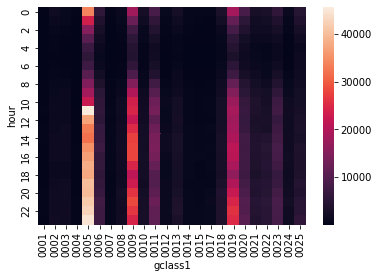

In [ ]:
sns.heatmap(pvhg_pivot)

In [ ]:
pvhg_pivot_scaled = pvhg_pivot

## standardize by gclass

In [ ]:
def standardization(data):
  mu = np.mean(data, axis=0)
  sigma = np.std(data, axis=0)
  return (data - mu) / sigma

In [ ]:
for gclass in pvhg_pivot.columns:
  pvhg_pivot_scaled[gclass] = standardization(pvhg_pivot[gclass])
pvhg_pivot_scaled

gclass1,0001,0002,0003,0004,0005,0006,0007,0008,0009,0010,0011,0012,0013,0014,0015,0017,0018,0019,0020,0021,0022,0023,0024,0025
hour,,,,,,,,,,,,,,,,,,,,,,,,
0,0.193555,0.912604,-0.110741,1.404886,0.442573,0.340149,0.257713,-0.051151,-0.117262,1.126127,-0.104516,0.073025,0.520855,0.336459,0.711437,0.194546,0.872834,0.396468,0.922093,-0.114338,-0.010333,0.023584,-0.355130,1.285496
1,-0.785112,0.001919,-0.528609,0.105195,-0.339105,-0.577512,-0.695741,-0.483304,-0.784749,-0.160750,-0.829239,-0.824138,-0.546781,0.095351,-0.167053,-0.872479,-0.180335,-0.592491,-0.265149,-0.727011,-0.526959,-0.750609,-0.851593,0.542046
2,-1.247632,-0.984133,-1.253290,-0.783674,-0.959578,-1.079520,-1.253981,-1.246774,-1.342956,-1.014733,-1.228587,-1.002643,-0.821878,-0.551835,-1.424043,-1.151440,-1.249416,-1.112505,-0.835238,-1.142630,-0.926928,-1.196960,-1.147620,-0.409840
3,-1.475541,-1.746178,-1.584572,-1.418580,-1.320045,-1.378923,-1.614614,-1.582893,-1.616034,-1.347931,-1.572148,-1.526567,-1.649350,-1.270929,-1.031526,-1.081700,-1.462238,-1.532750,-1.448217,-1.581482,-1.232904,-1.568854,-1.602454,-1.152446
4,-1.502354,-1.547293,-1.776566,-1.575439,-1.590829,-1.841074,-1.940666,-1.662921,-1.743924,-1.859534,-1.769241,-1.670299,-1.707207,-2.015404,-1.601610,-1.569882,-1.695944,-1.691286,-1.671394,-1.822421,-1.646205,-1.741936,-1.748926,-1.568474
5,-1.656527,-1.838293,-1.644805,-1.709890,-1.688878,-1.869544,-1.955486,-1.691731,-1.763490,-1.769020,-1.736065,-1.730573,-1.746507,-1.956184,-1.867961,-1.657057,-1.776498,-1.834723,-1.806894,-1.753581,-1.582210,-1.805868,-1.685712,-1.408138
6,-1.609605,-1.497048,-1.571396,-1.590378,-1.578696,-1.707268,-1.041554,-1.459649,-1.572967,-1.661452,-1.579766,-1.561341,-1.423378,-1.947724,-1.676376,-1.552447,-1.452293,-1.549477,-1.667219,-1.609018,-1.389559,-1.588735,-1.550033,-1.358350
7,-1.415212,-1.055313,-1.202468,-1.328946,-1.314242,-1.281652,-1.387366,-1.451646,-1.163050,-1.307265,-1.243086,-1.341107,-1.057674,-1.215940,-0.914705,-0.750434,-1.107203,-1.247949,-1.278556,-1.131443,-1.352228,-1.192672,-1.198500,-1.193795
8,-0.436546,-0.908766,-0.483434,-0.552119,-1.013991,-0.669562,-0.068339,-0.723389,-0.459774,-0.967509,-0.327168,-0.717498,-0.851352,-0.869082,-0.821249,-0.140207,-0.607967,-0.588051,-0.692906,-0.510166,-0.911596,-0.590001,-0.469224,-0.977764


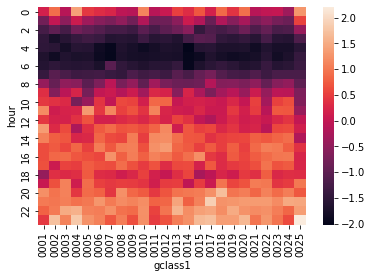

In [ ]:
sns.heatmap(pvhg_pivot_scaled)

## standardize by hour

In [ ]:
for hour in pvhg_pivot.index:
  pvhg_pivot_scaled.loc[hour] = standardization(pvhg_pivot.loc[hour])
pvhg_pivot_scaled

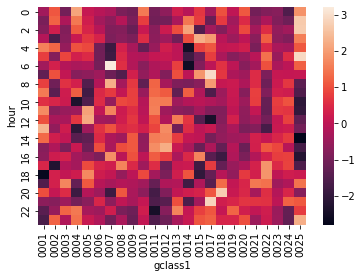

In [ ]:
sns.heatmap(pvhg_pivot_scaled)

# 計算興趣集中度

In [7]:
user_interest.sort_values('CID', inplace=True)
user_interest.reset_index(inplace=True, drop=True)
user_interest.head()

,CID,L1,n_pv
0,128.0,6.0,21.0
1,136.0,12.0,3.0
2,313.0,NaN,NaN
3,887.0,20.0,1.0
4,887.0,6.0,23.0


In [8]:
print(user_interest[user_interest['n_pv'].isnull()])
print(user_interest[user_interest['L1'].isnull()])
print(user_interest[user_interest['CID'].isnull()])

     CID  L1  n_pv
2  313.0 NaN   NaN
     CID  L1  n_pv
2  313.0 NaN   NaN
         CID    L1   n_pv
1964300  NaN  17.0   50.0
1964301  NaN   6.0  219.0
1964302  NaN   9.0  657.0
1964303  NaN  10.0   59.0


In [9]:
# 刪除缺失值
user_interest.dropna(inplace=True)
print(user_interest.shape)
user_interest.head()

(1964299, 3)


,CID,L1,n_pv
0,128.0,6.0,21.0
1,136.0,12.0,3.0
3,887.0,20.0,1.0
4,887.0,6.0,23.0
5,1106.0,19.0,3.0


In [10]:
user_interest.dtypes

CID     float64
L1      float64
n_pv    float64
dtype: object

In [11]:
user_interest = user_interest.astype(int)
user_interest.dtypes

CID     int64
L1      int64
n_pv    int64
dtype: object

In [30]:
user_interest_pivot = user_interest.pivot_table(index='CID', columns='L1', values='n_pv', fill_value=0)
user_interest_pivot.reset_index(inplace=True)
user_interest_pivot.head()

L1,CID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,128,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,136,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,887,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
4,1143,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,197,0,0,0


In [15]:
user_interest_pivot.iloc[2,:].index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64', name='L1')

In [65]:
user_interest_pivot['hhi'] = float(0)
user_interest_pivot.head()

L1,CID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,hhi
0,128,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,136,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,887,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0
3,1106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0.0
4,1143,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,197,0,0,0,0.0


In [59]:
def hhi(x):
  input = user_interest_pivot.iloc[x,1:26]
  s = sum(input)
  return sum(np.array(input/s) ** 2)

In [84]:
progress = ProgressBar()
for index in progress(user_interest_pivot.index):
  user_interest_pivot['hhi'][index] = hhi(index)

user_interest_pivot.head(10)

N/A% (0 of 1117924) |                    | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100% (1117924 of 1117924) |##############| Elapsed Time: 0:17:19 Time:  0:17:19


L1,CID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,hhi
0,128,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000
1,136,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000
2,887,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.920139
3,1106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1.000000
4,1143,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,197,0,0,0,0.722745
5,1566,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000
6,1579,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,147,5,0,0,0,0,0.924217
7,1655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,1.000000
8,1661,0,0,0,0,0,0,0,0,0,0,25,0,0,0,4,0,0,0,0,0,8,0,0,0,0,0.514974
9,1831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.000000


In [86]:
user_interest_pivot.to_scv('user_interest_hhi')

AttributeError: ignored